# Neville Modise 
## COMS4030A - Assignment 1_B - Linear Regression Implementation

In this assignment we implement a Linear Regression Model on a dataset which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
The dataset contains the following columns:
    * MODELYEAR e.g. 2014
    * MAKE e.g. Acura
    * MODEL e.g. ILX
    * VEHICLE CLASS e.g. SUV
    * ENGINE SIZE e.g. 4.7
    * CYLINDERS e.g 6
    * TRANSMISSION e.g. A6
    * FUELTYPE e.g. z
    * FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
    * FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
    * FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
    * CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [1]:
#Let's start by importing relevant python libraries.
import pandas as pd 
import numpy as np
from mpl_toolkits.mplot3d import axes3d # 3 d plots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import product
%matplotlib inline

## Loading the data


In [2]:
dataset = pd.read_csv('FuelConsumption.csv')
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Preprocessing

In [3]:
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Data Analysis

For the simple linear regression, we are looking for two variables in our data that are linearly correlated

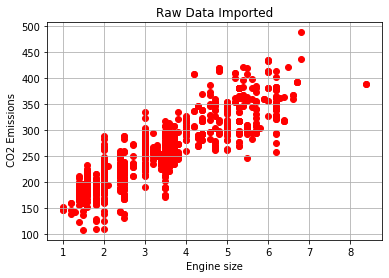

In [4]:
plt.scatter(dataset.ENGINESIZE, dataset.CO2EMISSIONS, color='red')
plt.xlabel("Engine size")
plt.ylabel(" CO2 Emissions")
plt.title('Raw Data Imported')
plt.grid(True)
plt.show()

This graph shows that Engine size is positively correlated with CO2 Emissions.

## Training & testing the data

Now that we have explored the data a bit we can split our data into the data that will be used to train the model and the data that will be used to test it at a later stage.

In [5]:
# test_size = % of our data
#random_state = modification of our data

X = dataset['ENGINESIZE']
y = dataset['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The objective of linear regression is to minimize the cost function which is given by
Cost Function (J): 
$$J(\theta_0, \theta_1) = \frac{1}{(2n)}\sum_{i = 1}^n \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)^{2}$$
where the hypothesis is given by a linear model:
$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

First we will have to create the hypothesis function for the simple linear regression: $h_\theta = \theta_o + \theta_1x$

In [6]:
def computeCost(theta0,theta1, x=X_train, y=y_train):
    n = len(x)
    J = sum(np.square((theta0+theta1*x)-y))
    return (0.5*n)*J 

In batch Gradient Descent, each iteration performs the update and repeats until Convergence (updating parameters simultaneously)

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J\Bigl(\theta_0, \theta_1\Bigr)$$
where <br>
for j = 0    
$$\frac{\partial}{\partial \theta_0} J\Bigl(\theta_0, \theta_1\Bigr) = \frac{1}{n}\sum_{i = 1}^n \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)$$<br>
for j = 1,2,3...n        
$$\frac{\partial}{\partial \theta_j} J\Bigl(\theta_0, \theta_1\Bigr) = \frac{1}{n}\sum_{i = 1}^n \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)x^{(i)}$$
With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest

We now define the Gradient Descent Function

In [7]:
def gradientDescent(X,Y,alpha,num_iter, J_history=False ):
    theta0 = 0 #Array for storing the current value of theta0
    theta1 = 0 #Array for storing the current value of theta1
    
    t0s = [] #Array for storing different values of theta0 on each iteration
    t1s = [] #Array for storing different values of theta0 on each iteration
    costs = [] #Stores the associated cost for each pair of theta0 and theta1 
    for i in range(num_iter):
        
        t0s.append(theta0)
        t1s.append(theta1)
        costs.append(computeCost(theta0,theta1,X,Y))
        #Gradient Descent
        n=len(X)
        theta0  = theta0 - (alpha * ((1/n)*sum((theta0+theta1*X)-Y)))
        theta1 = theta1 - (alpha * ((1/n)*sum(((theta0+theta1*X)-Y)*X)))  
        
    
    #We concatenate the values into a dataframe
    J_df = pd.DataFrame()
    J_df['Theta0'] = t0s 
    J_df['Theta1'] = t1s
    J_df['Cost_gd'] = costs  
    #The function can either return the dataframe of J_history or simply the values it has found for theta0 and theta1
    if J_history:
        return J_df
    else:
        return theta0,theta1
    


## Testing the effect different learning rates on convergence
The goal here is to utilize the gradient descent technique to evaluate various learning rates and choose the most efficient one.
We test the following learning rates: 0.001 and 0.05 . We execute the gradient descent process for 50 iterations on each occasion, then plot the cost versus the number of iterations for each learning rate to see which learning rate converges quicker than the others.

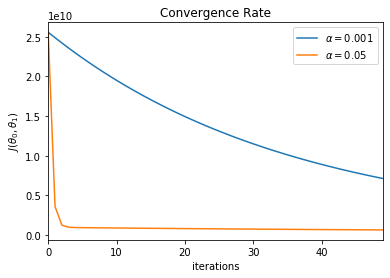

In [8]:
J_history_1 = gradientDescent(X_train,y_train,0.001,50,True)
J_history_1.Cost_gd.plot( label = '$\\alpha=0.001$')
J_history_2 = gradientDescent(X_train,y_train,0.05,50,True)
J_history_2.Cost_gd.plot(label = '$\\alpha=0.05$')
plt.title('Convergence Rate')
plt.xlabel('iterations')
plt.ylabel('$J(\\theta_0, \\theta_1)$')
plt.legend()

plt.show()

The graph shows that the curve in orange, which represents a learning rate of 0.05 converges faster than the blue graph 0.001 .Therefore the best learning rates for this model is 0.05

But what happens when we have large learning rate ?

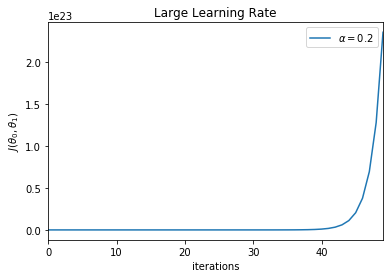

In [9]:
J_history_3 = gradientDescent(X_train,y_train,0.2,50,True)
J_history_3.Cost_gd.plot(label = '$\\alpha=0.2$')
plt.title('Large Learning Rate')
plt.xlabel('iterations')
plt.ylabel('$J(\\theta_0, \\theta_1)$')
plt.legend()
plt.show()

When the learning rate is large, the function diverges

Anyway now that we have seen the effect of different learning rates on convergence, and we have chosen 0.05 as our learning rate we now plot

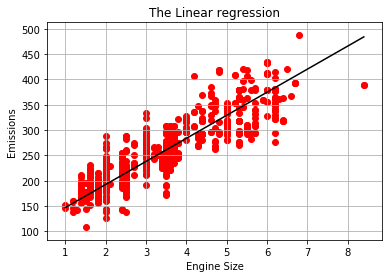

In [10]:
#This is for fitting the model
est_theta0, est_theta1 = gradientDescent(X_train,y_train,0.05,200)
Y_pred = est_theta0+est_theta1*X_train

#This is the regression line plot
plt.plot([min(X_train),max(X_train)],[min(Y_pred),max(Y_pred)], c='black')

plt.scatter(X_train,y_train,c='red')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.title('The Linear regression')
plt.grid(True)
plt.show()

### Here we visualize the Gradient Descent

We visualize the Gradient Descent Algorithm using a plot of the Cost Function

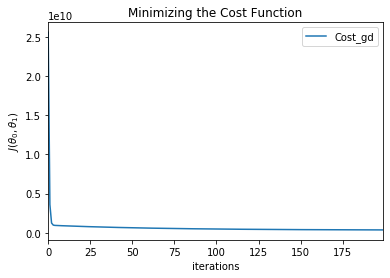

In [11]:
J_history= gradientDescent(X_train,y_train,0.05,200,True)
J_history.Cost_gd.plot()
plt.title('Minimizing the Cost Function')
plt.xlabel('iterations')
plt.ylabel('$J(\\theta_0, \\theta_1)$')
plt.legend()

This is what the cost function looks like when we plot it with learning rate of 0.05 and 200 iterations

## 3D Gradient Descent Visualizaton

 Here we visualize the GD using a 3D Surface

In [12]:
def find_cost_function_visual(t0,t1,x,y): #Used to calculate the corresponding cost function for an array of theta0s and theta1s
    c = []
    for i in range(len(t0)):
        c.append(computeCost(t0[i],t1[i],x,y))
    return c

def cost_function_visual(result_df,x,y,xlimits, ylimits,levels):
    dat0 = np.linspace(xlimits[0],xlimits[1],50) # creates axis for theta0 grid
    dat1 = np.linspace(ylimits[0],ylimits[1],50) ## creates axis for theta0 grid
    
    #Creates a dataframe for theta0 and theta1 values
    plot_df = pd.DataFrame(product(dat0, dat1), columns=['Theta0', 'Theta1']) 
    
    dat2 = find_cost_function_visual(plot_df.Theta0,plot_df.Theta1,x,y)
    plot_df['Cost'] = dat2# Adds costs to the dataframe we created

    #the columns are the theta1 values, 
    #and the values are the corresponding cost for a given theta0 and theta1 value 
    Cost_grid = plot_df.pivot_table(index='Theta0', columns='Theta1', values='Cost').T.values

    #This creates the grid for plotting
    Theta0_unique = np.sort(plot_df.Theta0.unique())
    Theta1_unique = np.sort(plot_df.Theta1.unique())
    Theta0_grid, Theta1_grid = np.meshgrid(Theta0_unique, Theta1_unique)
    
    #3D Surface plot
    
    fig = plt.figure(figsize = (15,6))
    ax = fig.add_subplot(122, projection = '3d') 
    ax.plot_surface(Theta0_grid, Theta1_grid, Cost_grid, rstride = 1, cstride = 1, alpha = 0.6, cmap = plt.cm.jet)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$J(\\theta_0, \\theta_1)$', rotation=90,)
    ax.set_zlim(Cost_grid.min(), Cost_grid.max())
    ax.view_init(elev = 15, azim = 230)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')




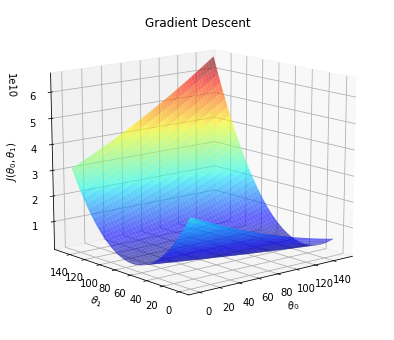

In [13]:
J_history = gradientDescent(X_train,y_train,0.05,200,J_history=True)
cost_function_visual(J_history, x= X_train, y =y_train, xlimits=(0,150), ylimits=[0,150], levels = 70)
plt.title('Gradient Descent')
plt.show()

This is a 3D Surface of the Gradient Descent

## Feature Scaling 

Feature Scaling is an Improved Learning technique we use to optimize our model. We are just utilizing one feature ('Engine Size') to try to forecast our goal variable ('Emissions'), thus rather than scaling various input features, we may scale both our input and output features to get the same effect.

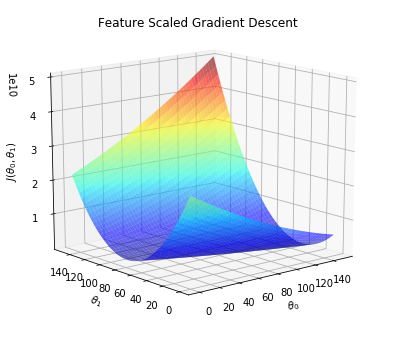

In [21]:
scaled_X_train = X_train-X_train.mean()/max(X_train)
scaled_y_train = y_train-y_train.mean()/max(y_train)

scaled_J_history = gradientDescent(scaled_X_train,scaled_y_train,0.05,250,J_history=True )
cost_function_visual(scaled_J_history, x= scaled_X_train, y = scaled_y_train,xlimits=(0,150), ylimits=[0,150], levels=70)
plt.title('Feature Scaled Gradient Descent')
plt.show()

As we can see Feature Scaling altred our model, and we can see our model converges faster

## Regularization

Regularization helps to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.

In [15]:
#Regularized gradient descent
def gradientDescent_regular(X,Y,alpha,num_iter,lmbda):
    theta0 = 0 #Array for storing the current value of theta0
    theta1 = 0 #Array for storing the current value of theta1
    for i in range(num_iter):
        #Regularization GD
        n=len(X)
        theta0  = theta0 - (alpha * ((1/n)*sum((theta0+theta1*X)-Y)))
        theta1 =  theta1*(1-alpha * (lmbda/n)) - (alpha * ((1/n)*sum(((theta0+theta1*X)-Y)*X)))  

    return theta0,theta1
   


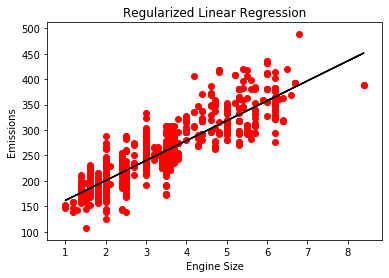

In [18]:
#Fit
regularized_theta0, regularized_theta1 = gradientDescent_regular(X_train,y_train,0.05,200 ,300 )
Y_pred = regularized_theta0+regularized_theta1*X_train
plt.plot(X_train,Y_pred, c='black')
plt.scatter(X_train,y_train,c='red')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.title('Regularized Linear Regression')
plt.show()

Regularization altered our Linear Regression slightly